In [13]:
# 需要Python ≥3.5 
import sys
assert sys.version_info >= (3, 5)

# 需要Scikit-Learn ≥0.20 
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    %tensorflow_version 2.x
except Exception:
    pass

# 需要TensorFlow ≥2.0 
import tensorflow as tf
assert tf.__version__ >= "2.0"

import numpy as np
import pandas as pd
import os

# 让每次运行的结果稳定
np.random.seed(42)

# 让画出的图像效果更好
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 自动创建images文件夹
PROJECT_ROOT_DIR = "."
IMAGE_FILE = "images"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, IMAGE_FILE)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    """
    运行即可自动保存图片
    
    :param fig_id: 图片的名称
    :tight_layout: 自动调整图片的坐标轴
    """
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# 忽略掉没有用的警告 (SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [14]:
import tensorflow as tf

In [15]:
# 查看TensorFlow的版本
tf.__version__

'2.1.0'

In [16]:
# 查看Keras的版本
tf.keras.__version__

'2.2.4-tf'

In [17]:
# 读取文件
raw_data = pd.read_excel("Fe_test_regression.xlsx")

In [18]:
raw_data.head()

,Sample type,天然：1,SiO2,TiO2,Al2O3,Cr2O3,FeOtot,MnO,MgO,CaO,Na2O,K2O,P2O5,NiO,ZnO,Li2O,ZrO2,V2O5,Fe3+/Fetot
0,hedenbergite (CaFeSi2O6)–petedunnite (CaZnSi2O...,2.0,48.09,NaN,NaN,NaN,29.61,NaN,NaN,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000
1,hedenbergite (CaFeSi2O6)–petedunnite (CaZnSi2O...,2.0,48.18,NaN,NaN,NaN,29.17,NaN,NaN,22.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000
2,hedenbergite (CaFeSi2O6)–petedunnite (CaZnSi2O...,2.0,48.41,NaN,NaN,NaN,24.42,NaN,NaN,22.53,NaN,NaN,NaN,NaN,5.16,NaN,NaN,NaN,0.000
3,hedenbergite (CaFeSi2O6)–petedunnite (CaZnSi2O...,2.0,47.37,NaN,NaN,NaN,22.81,NaN,NaN,22.12,NaN,NaN,NaN,NaN,7.61,NaN,NaN,NaN,0.000
4,hedenbergite (CaFeSi2O6)–petedunnite (CaZnSi2O...,2.0,47.47,NaN,NaN,NaN,18.96,NaN,NaN,22.49,NaN,NaN,NaN,NaN,10.81,NaN,NaN,NaN,0.106


In [19]:
# 获取有用的特征维度
raw_data = raw_data.iloc[:, 2:]
raw_data.head()

,SiO2,TiO2,Al2O3,Cr2O3,FeOtot,MnO,MgO,CaO,Na2O,K2O,P2O5,NiO,ZnO,Li2O,ZrO2,V2O5,Fe3+/Fetot
0,48.09,NaN,NaN,NaN,29.61,NaN,NaN,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000
1,48.18,NaN,NaN,NaN,29.17,NaN,NaN,22.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000
2,48.41,NaN,NaN,NaN,24.42,NaN,NaN,22.53,NaN,NaN,NaN,NaN,5.16,NaN,NaN,NaN,0.000
3,47.37,NaN,NaN,NaN,22.81,NaN,NaN,22.12,NaN,NaN,NaN,NaN,7.61,NaN,NaN,NaN,0.000
4,47.47,NaN,NaN,NaN,18.96,NaN,NaN,22.49,NaN,NaN,NaN,NaN,10.81,NaN,NaN,NaN,0.106


In [20]:
# 查看数据集是否有空值
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 17 columns):
SiO2          390 non-null float64
TiO2          354 non-null float64
Al2O3         364 non-null float64
Cr2O3         348 non-null float64
FeOtot        390 non-null float64
MnO           330 non-null float64
MgO           379 non-null float64
CaO           390 non-null float64
Na2O          380 non-null float64
K2O           169 non-null float64
P2O5          5 non-null float64
NiO           171 non-null float64
ZnO           15 non-null float64
Li2O          5 non-null float64
ZrO2          3 non-null float64
V2O5          8 non-null float64
Fe3+/Fetot    390 non-null float64
dtypes: float64(17)
memory usage: 51.9 KB


In [21]:
from sklearn.impute import SimpleImputer

# 用平均值对数据集进行插值
imputer = SimpleImputer(strategy="mean")
processed_data = pd.DataFrame(imputer.fit_transform(raw_data))
processed_data.columns = raw_data.columns

In [22]:
processed_data.head()

,SiO2,TiO2,Al2O3,Cr2O3,FeOtot,MnO,MgO,CaO,Na2O,K2O,P2O5,NiO,ZnO,Li2O,ZrO2,V2O5,Fe3+/Fetot
0,48.09,0.683474,5.634114,0.804728,29.61,0.112056,14.362567,21.60,2.171707,0.030234,0.2052,0.050912,7.26,7.684,0.64,0.042,0.000
1,48.18,0.683474,5.634114,0.804728,29.17,0.112056,14.362567,22.95,2.171707,0.030234,0.2052,0.050912,7.26,7.684,0.64,0.042,0.000
2,48.41,0.683474,5.634114,0.804728,24.42,0.112056,14.362567,22.53,2.171707,0.030234,0.2052,0.050912,5.16,7.684,0.64,0.042,0.000
3,47.37,0.683474,5.634114,0.804728,22.81,0.112056,14.362567,22.12,2.171707,0.030234,0.2052,0.050912,7.61,7.684,0.64,0.042,0.000
4,47.47,0.683474,5.634114,0.804728,18.96,0.112056,14.362567,22.49,2.171707,0.030234,0.2052,0.050912,10.81,7.684,0.64,0.042,0.106


In [23]:
# 分开特征值和标签值
X = processed_data.drop(["Fe3+/Fetot"], axis=1)
y = processed_data["Fe3+/Fetot"]

In [24]:
from sklearn.model_selection import train_test_split

# 划分训练集、验证集、测试集
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [25]:
from sklearn.preprocessing import StandardScaler

# 标准化训练集、验证集、测试集（使用相同的mean、std）
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

# Sequential API

In [26]:
# 销毁当前的 TF 图并创建一个新图,避免旧模型/网络层混乱
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

# 构建输入层、隐藏层、输出层,建立神经网络模型
model_1 = Sequential()
model_1.add(Input(shape=X_train.shape[1:]))
model_1.add(Dense(30, activation="relu"))
model_1.add(Dense(1))

In [28]:
# 设定神经网络的损失函数，优化器
model_1.compile(loss="mean_squared_error",
                optimizer="sgd")

In [29]:
# 看各层的参数个数
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                510       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 541
Trainable params: 541
Non-trainable params: 0
_________________________________________________________________


In [30]:
# 训练神经网络
history_1 = model_1.fit(X_train, y_train, epochs=30,
                        validation_data=(X_valid, y_valid))

Train on 234 samples, validate on 78 samples
Epoch 1/30
234/234 [==============================] - 0s 2ms/sample - loss: 189009.7860 - val_loss: 1932694.9038
Epoch 2/30
234/234 [==============================] - 0s 75us/sample - loss: 273562.6095 - val_loss: 1778.1044
Epoch 3/30
234/234 [==============================] - 0s 81us/sample - loss: 1571.2366 - val_loss: 1286.7459
Epoch 4/30
234/234 [==============================] - 0s 73us/sample - loss: 1096.1749 - val_loss: 1266701.2308
Epoch 5/30
234/234 [==============================] - 0s 64us/sample - loss: 179863.0960 - val_loss: 2183.7810
Epoch 6/30
234/234 [==============================] - 0s 75us/sample - loss: 1929.6025 - val_loss: 1580.4120
Epoch 7/30
234/234 [==============================] - 0s 64us/sample - loss: 1396.6452 - val_loss: 1143.7614
Epoch 8/30
234/234 [==============================] - 0s 66us/sample - loss: 1010.9198 - val_loss: 827.6793
Epoch 9/30
234/234 [==============================] - 0s 64us/sample - lo

In [31]:
# 看测试集的评分
mse_test_1 = model_1.evaluate(X_test, y_test)

78/78 [==============================] - 0s 45us/sample - loss: 0.6461


In [32]:
# 查看测试集数据的预测值
y_pred_1 = model_1.predict(X_test)
y_pred_1

array([[1.081088],
       [1.081088],
       [1.081088],
       [1.081088],
       [1.081088],
       [1.081088],
       [1.081088],
       [1.081088],
       [1.081088],
       [1.081088],
       [1.081088],
       [1.081088],
       [1.081088],
       [1.081088],
       [1.081088],
       [1.081088],
       [1.081088],
       [1.081088],
       [1.081088],
       [1.081088],
       [1.081088],
       [1.081088],
       [1.081088],
       [1.081088],
       [1.081088],
       [1.081088],
       [1.081088],
       [1.081088],
       [1.081088],
       [1.081088],
       [1.081088],
       [1.081088],
       [1.081088],
       [1.081088],
       [1.081088],
       [1.081088],
       [1.081088],
       [1.081088],
       [1.081088],
       [1.081088],
       [1.081088],
       [1.081088],
       [1.081088],
       [1.081088],
       [1.081088],
       [1.081088],
       [1.081088],
       [1.081088],
       [1.081088],
       [1.081088],
       [1.081088],
       [1.081088],
       [1.08

In [33]:
# 保存model_1模型到keras_model_1.h5中
model_1.save("keras_model_1.h5")

In [34]:
# 加载keras_model_1.h5的模型
# model_1 = keras.models.load_model("keras_model.h5")

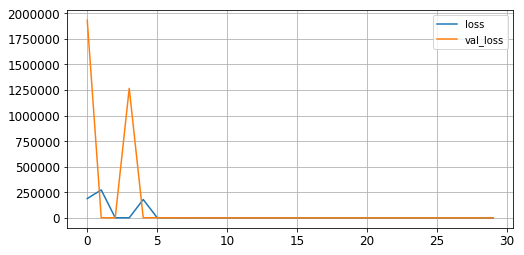

Saving figure learning_curves_1


<Figure size 432x288 with 0 Axes>

In [35]:
def loss_compared(history):
    """
    画训练集、测试集中损失函数的值变化
    
    :param history: 神经网络的训练过程
    """

    labels = list(history.history.keys())
    plt.figure(figsize=(8, 4))
    for i in labels:
        plt.plot(history.history[i], label=i)
    plt.legend()
    plt.grid(True)
    plt.show()

loss_compared(history_1)   
save_fig("learning_curves_1")

# Function API

![wide_deep_model](./learning_images/wide_deep_model.png)

In [36]:
# 销毁当前的 TF 图并创建一个新图,避免旧模型/网络层混乱
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [37]:
from tensorflow.keras.layers import Input, Dense, concatenate
from tensorflow.keras.models import Model

# 构建输入层、隐藏层、输出层，形成 Wide&Deep neural network，具体参照上图
input_ = Input(shape=X_train.shape[1:])
hidden1 = Dense(30, activation="relu")(input_)
hidden2 = Dense(30, activation="relu")(hidden1)
concat = concatenate([input_, hidden2])
output = Dense(1)(concat)
model_2 = Model(inputs=[input_], outputs=[output])

In [38]:
# 图神经网络的各层参数信息
model_2.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 16)]         0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 30)           510         input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           930         dense[0][0]                      
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 46)           0           input_1[0][0]                    
                                                                 dense_1[0][0]                

In [39]:
# 设置损失函数、优化器
model_2.compile(loss="mean_squared_error",
              optimizer=keras.optimizers.Adam())

In [40]:
# 保存迭代过程中，使得在验证集中损失函数值最小的模型到keras_model_2.h5中
checkpoint_cb = keras.callbacks.ModelCheckpoint("keras_model_2.h5", save_best_only=True)

In [41]:
# 训练模型
history_2 = model_2.fit(X_train, y_train, epochs=30,
                        validation_data=(X_valid, y_valid),
                        callbacks=[checkpoint_cb])

Train on 234 samples, validate on 78 samples
Epoch 1/30
234/234 [==============================] - 0s 1ms/sample - loss: 7.3944 - val_loss: 8.0728
Epoch 2/30
234/234 [==============================] - 0s 135us/sample - loss: 4.9816 - val_loss: 5.4829
Epoch 3/30
234/234 [==============================] - 0s 126us/sample - loss: 3.4239 - val_loss: 3.2566
Epoch 4/30
234/234 [==============================] - 0s 130us/sample - loss: 2.5257 - val_loss: 2.2210
Epoch 5/30
234/234 [==============================] - 0s 125us/sample - loss: 1.9229 - val_loss: 1.6799
Epoch 6/30
234/234 [==============================] - 0s 117us/sample - loss: 1.6340 - val_loss: 1.3707
Epoch 7/30
234/234 [==============================] - 0s 121us/sample - loss: 1.4374 - val_loss: 1.1718
Epoch 8/30
234/234 [==============================] - 0s 124us/sample - loss: 1.2489 - val_loss: 1.0203
Epoch 9/30
234/234 [==============================] - 0s 118us/sample - loss: 1.1032 - val_loss: 0.9159
Epoch 10/30
234/234 [

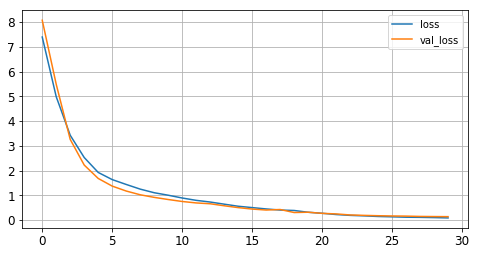

Saving figure learning_curves_2


<Figure size 432x288 with 0 Axes>

In [42]:
loss_compared(history_2)
save_fig("learning_curves_2")

In [43]:
# 通过测试集获得评分
mse_test_2 = model_2.evaluate(X_test, y_test)

78/78 [==============================] - 0s 42us/sample - loss: 0.4907


In [44]:
# 模型对测试集的预测值
y_pred_2 = model_2.predict(X_test)
y_pred_2

array([[ 0.59272224],
       [ 0.06942875],
       [ 0.10735781],
       [ 0.70415956],
       [-0.969413  ],
       [ 3.9476905 ],
       [ 0.2726577 ],
       [-0.64795464],
       [ 0.18293746],
       [-0.19410197],
       [-1.0225087 ],
       [ 0.13434632],
       [ 0.33934242],
       [ 0.2503355 ],
       [ 0.00695021],
       [-0.91671723],
       [ 0.2804225 ],
       [ 0.31221515],
       [ 0.04511005],
       [ 0.27808028],
       [ 0.01396639],
       [ 0.20759566],
       [ 0.5185793 ],
       [ 0.12648042],
       [ 0.24848635],
       [-0.04847115],
       [ 0.03234703],
       [ 0.00786955],
       [ 0.43364984],
       [ 3.808925  ],
       [ 3.855823  ],
       [ 0.09234459],
       [ 0.29453307],
       [ 0.29234678],
       [ 0.09358055],
       [ 0.29729396],
       [ 0.04619438],
       [-0.10271113],
       [-0.05588453],
       [ 0.32183105],
       [ 0.10414059],
       [ 0.41704923],
       [ 0.28871375],
       [-0.18488424],
       [ 0.31046993],
       [ 0

In [45]:
# 从keras_model_2.h5中加载迭代过程中使得损失函数最小的模型
model_2_best = keras.models.load_model("keras_model_2.h5")

In [46]:
mse_test_best = model_2_best.evaluate(X_test, y_test)

78/78 [==============================] - 0s 611us/sample - loss: 0.4907


![overlapping_feature](./learning_images/overlapping_feature.png)

In [47]:
# 销毁当前的 TF 图并创建一个新图,避免旧模型/网络层混乱
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [48]:
# 构建两个输入层，建立二输入的神经网络，具体参照上图
input_A = Input(shape=[8], name="wide_input")
input_B = Input(shape=[12], name="deep_input")
hidden1 = Dense(30, activation="relu")(input_B)
hidden2 = Dense(30, activation="relu")(hidden1)
concat = concatenate([input_A, hidden2])
output = Dense(1, name="output")(concat)
model_3 = Model(inputs=[input_A, input_B], outputs=[output])

In [49]:
# 设定模型的损失函数和优化器
model_3.compile(loss="mse", optimizer="adam")

In [50]:
# 保存迭代过程中，使得在验证集中损失函数值最小的模型到keras_model_3.h5中
checkpoint_cb = keras.callbacks.ModelCheckpoint("keras_model_3.h5", save_best_only=True)

In [51]:
# 使用早期停止法，防止过拟合
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,
                                                  restore_best_weights=True)

In [52]:
# 将训练集、测试集、验证集的特征值分成两类
X_train_A, X_train_B = X_train.iloc[:, :8], X_train.iloc[:, 4:]
X_valid_A, X_valid_B = X_valid.iloc[:, :8], X_valid.iloc[:, 4:]
X_test_A, X_test_B = X_test.iloc[:, :8], X_test.iloc[:, 4:]

In [53]:
history_3 = model_3.fit((X_train_A, X_train_B), y_train, epochs=100,
                         validation_data=((X_valid_A, X_valid_B), y_valid),
                         callbacks=[checkpoint_cb, early_stopping_cb])

Train on 234 samples, validate on 78 samples
Epoch 1/100
234/234 [==============================] - 0s 1ms/sample - loss: 11.3646 - val_loss: 9.7947
Epoch 2/100
234/234 [==============================] - 0s 141us/sample - loss: 6.2702 - val_loss: 6.8161
Epoch 3/100
234/234 [==============================] - 0s 148us/sample - loss: 4.1654 - val_loss: 4.6024
Epoch 4/100
234/234 [==============================] - 0s 134us/sample - loss: 3.3378 - val_loss: 3.3900
Epoch 5/100
234/234 [==============================] - 0s 132us/sample - loss: 2.4722 - val_loss: 2.7240
Epoch 6/100
234/234 [==============================] - 0s 127us/sample - loss: 2.1272 - val_loss: 2.2626
Epoch 7/100
234/234 [==============================] - 0s 128us/sample - loss: 1.8733 - val_loss: 1.9998
Epoch 8/100
234/234 [==============================] - 0s 138us/sample - loss: 1.7143 - val_loss: 1.8068
Epoch 9/100
234/234 [==============================] - 0s 133us/sample - loss: 1.6028 - val_loss: 1.6698
Epoch 10/10

Epoch 78/100
234/234 [==============================] - 0s 118us/sample - loss: 0.2627 - val_loss: 0.3488
Epoch 79/100
234/234 [==============================] - 0s 119us/sample - loss: 0.2535 - val_loss: 0.3316
Epoch 80/100
234/234 [==============================] - 0s 70us/sample - loss: 0.2585 - val_loss: 0.3345
Epoch 81/100
234/234 [==============================] - 0s 61us/sample - loss: 0.2551 - val_loss: 0.3451
Epoch 82/100
234/234 [==============================] - 0s 117us/sample - loss: 0.2505 - val_loss: 0.3194
Epoch 83/100
234/234 [==============================] - 0s 66us/sample - loss: 0.2464 - val_loss: 0.3231
Epoch 84/100
234/234 [==============================] - 0s 59us/sample - loss: 0.2549 - val_loss: 0.3655
Epoch 85/100
234/234 [==============================] - 0s 114us/sample - loss: 0.2571 - val_loss: 0.3100
Epoch 86/100
234/234 [==============================] - 0s 129us/sample - loss: 0.2323 - val_loss: 0.3056
Epoch 87/100
234/234 [============================

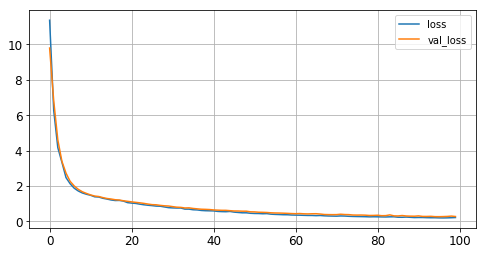

Saving figure learning_curves_3


<Figure size 432x288 with 0 Axes>

In [54]:
loss_compared(history_3)
save_fig("learning_curves_3")

In [55]:
# 使用验证集获取模型的评分
mse_test_3 = model_3.evaluate((X_test_A, X_test_B), y_test)

78/78 [==============================] - 0s 45us/sample - loss: 1.2652


In [56]:
# 用模型来预测测试集的数据
y_pred_3 = model_3.predict((X_test_A, X_test_B))
y_pred_3

array([[ 7.86605895e-01],
       [ 6.60687506e-01],
       [ 7.16984332e-01],
       [ 1.35244989e+00],
       [-5.37898004e-01],
       [ 6.02543926e+00],
       [-2.08355606e-01],
       [ 1.25124991e-01],
       [ 1.76506579e-01],
       [ 5.32665849e-02],
       [-5.92121542e-01],
       [-2.28107870e-01],
       [ 1.16742194e-01],
       [-3.93556952e-02],
       [-6.62018239e-01],
       [ 3.42064500e-02],
       [ 4.68741059e-02],
       [-3.41390967e-02],
       [ 7.59511590e-02],
       [ 1.28910637e+00],
       [-2.01806808e+00],
       [-8.35265517e-02],
       [ 1.08695567e-01],
       [-1.47909582e-01],
       [-1.47100389e-01],
       [-1.53105199e-01],
       [ 1.63096011e-01],
       [-2.53138959e-01],
       [ 3.01672041e-01],
       [ 5.48971653e+00],
       [ 5.76623154e+00],
       [ 3.79818022e-01],
       [ 2.49445975e-01],
       [ 1.35535777e-01],
       [ 1.24793630e-02],
       [ 2.20202982e-01],
       [ 3.49274695e-01],
       [-6.89802766e-02],
       [-3.9

![regularization](./learning_images/regularization.png)

In [57]:
np.random.seed(42)
tf.random.set_seed(42)

In [58]:
# 构建两个输入层，两个输出层，建立正则化的Wide & Deep neural network 
input_A = Input(shape=[8], name="wide_input")
input_B = Input(shape=[12], name="deep_input")
hidden1 = Dense(30, activation="relu")(input_B)
hidden2 = Dense(30, activation="relu")(hidden1)
concat = concatenate([input_A, hidden2])
output = Dense(1, name="main_output")(concat)
aux_output = Dense(1, name="aux_output")(hidden2)
model_4 = Model(inputs=[input_A, input_B],
              outputs=[output, aux_output])

In [59]:
# 构建模型的损失函数，优化器，各输出层权重
model_4.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1],
              optimizer="adam")

In [60]:
# 训练模型
history_4 = model_4.fit([X_train_A, X_train_B], [y_train, y_train], epochs=30,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Train on 234 samples, validate on 78 samples
Epoch 1/30
234/234 [==============================] - 0s 2ms/sample - loss: 11.6969 - main_output_loss: 11.1148 - aux_output_loss: 14.5265 - val_loss: 9.9158 - val_main_output_loss: 9.7994 - val_aux_output_loss: 10.9369
Epoch 2/30
234/234 [==============================] - 0s 83us/sample - loss: 6.6429 - main_output_loss: 5.9180 - aux_output_loss: 10.3113 - val_loss: 6.7206 - val_main_output_loss: 6.8274 - val_aux_output_loss: 6.4030
Epoch 3/30
234/234 [==============================] - 0s 87us/sample - loss: 4.2764 - main_output_loss: 4.1090 - aux_output_loss: 5.4186 - val_loss: 4.4177 - val_main_output_loss: 4.7143 - val_aux_output_loss: 2.5836
Epoch 4/30
234/234 [==============================] - 0s 88us/sample - loss: 3.2467 - main_output_loss: 3.6503 - aux_output_loss: 2.0303 - val_loss: 3.1682 - val_main_output_loss: 3.4829 - val_aux_output_loss: 0.9584
Epoch 5/30
234/234 [==============================] - 0s 100us/sample - loss: 2.353

In [61]:
# 获取整个神经网络的损失函数值及单个输出层的损失函数值
total_loss, main_loss, aux_loss = model_4.evaluate([X_test_A, X_test_B], [y_test, y_test])

78/78 [==============================] - 0s 62us/sample - loss: 1.1894 - main_output_loss: 1.2248 - aux_output_loss: 0.1189


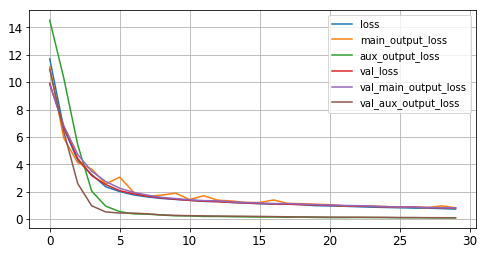

Saving figure learning_curves_4


<Figure size 432x288 with 0 Axes>

In [62]:
loss_compared(history_4)
save_fig("learning_curves_4")

In [63]:
# 获取两个输出层对测试集数据的预测值
y_pred_main, y_pred_aux = model_4.predict([X_test_A, X_test_B])
y_pred_main, y_pred_aux

(array([[ 1.9228879 ],
        [ 1.3452479 ],
        [ 0.08091839],
        [ 3.5672166 ],
        [-1.2711343 ],
        [ 4.5210104 ],
        [-0.42315236],
        [-0.67841953],
        [-0.15144625],
        [ 0.64177424],
        [-1.2369097 ],
        [-0.25679007],
        [-0.0306019 ],
        [ 0.0188342 ],
        [-0.62952083],
        [-0.5928659 ],
        [-0.11991874],
        [-0.02359954],
        [ 0.632114  ],
        [ 2.1291862 ],
        [-3.0846317 ],
        [-0.12681189],
        [ 0.35249814],
        [-0.34067002],
        [-0.34210435],
        [ 0.56914693],
        [ 0.7342058 ],
        [-0.32264367],
        [ 0.628171  ],
        [ 4.2949734 ],
        [ 4.314557  ],
        [ 1.0802146 ],
        [ 0.01627883],
        [ 0.00898942],
        [-0.12757435],
        [ 0.29217967],
        [ 0.7800556 ],
        [ 0.04616912],
        [-0.51511234],
        [-0.29631892],
        [ 0.67637116],
        [ 1.207337  ],
        [-0.05193464],
        [ 0

# Subclassing API

In [64]:
class WideAndDeepModel(keras.models.Model):
    """建立动态模型"""
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

In [65]:
# 构建二输入、二输出的正则化神经网络模型
model_5 = WideAndDeepModel(30, activation="relu")

In [66]:
# 选择模型的损失函数、优化器、各输出层的权重
model_5.compile(loss="mse",
                loss_weights=[0.9, 0.1],
                optimizer=keras.optimizers.Adam())

In [67]:
# 训练模型
history_5 = model_5.fit((np.array(X_train_A), np.array(X_train_B)), (np.array(y_train), np.array(y_train)),
                        epochs=30, validation_data=((np.array(X_valid_A), np.array(X_valid_B)),(np.array(y_valid), np.array(y_valid))))

Train on 234 samples, validate on 78 samples
Epoch 1/30
234/234 [==============================] - 0s 2ms/sample - loss: 9.4641 - output_1_loss: 5.1975 - output_2_loss: 47.0856 - val_loss: 5.5524 - val_output_1_loss: 5.1360 - val_output_2_loss: 21.7310
Epoch 2/30
234/234 [==============================] - 0s 93us/sample - loss: 5.0205 - output_1_loss: 3.4417 - output_2_loss: 16.7727 - val_loss: 3.4833 - val_output_1_loss: 4.1227 - val_output_2_loss: 8.3973
Epoch 3/30
234/234 [==============================] - 0s 69us/sample - loss: 2.6380 - output_1_loss: 2.0555 - output_2_loss: 7.1477 - val_loss: 2.0225 - val_output_1_loss: 2.7537 - val_output_2_loss: 3.6437
Epoch 4/30
234/234 [==============================] - 0s 90us/sample - loss: 1.8756 - output_1_loss: 1.6846 - output_2_loss: 2.6681 - val_loss: 1.3985 - val_output_1_loss: 2.1135 - val_output_2_loss: 1.2944
Epoch 5/30
234/234 [==============================] - 0s 93us/sample - loss: 1.2047 - output_1_loss: 1.1595 - output_2_loss: 

In [68]:
# # 获取整个神经网络的损失函数值及单个输出层的损失函数值
total_loss, main_loss, aux_loss = model_5.evaluate((X_test_A, X_test_B), (y_test, y_test))

78/78 [==============================] - 0s 55us/sample - loss: 0.2742 - output_1_loss: 0.2672 - output_2_loss: 0.4391


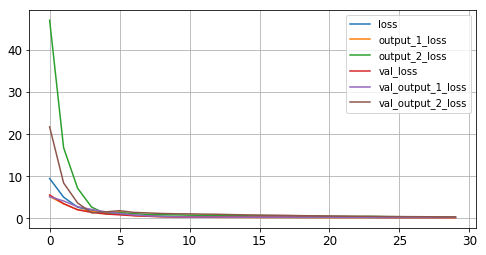

Saving figure learning_curves_5


<Figure size 432x288 with 0 Axes>

In [69]:
loss_compared(history_5)
save_fig("learning_curves_5")

# TensorBoard

In [70]:
root_logdir = os.path.join(os.curdir, "my_logs")

In [71]:
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'./my_logs/run_2020_09_04-05_51_55'

In [72]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [73]:
model = Sequential()
model.add(Input(shape=X_train.shape[1:]))
model.add(Dense(30, activation="relu"))
model.add(Dense(30, activation="relu"))
model.add(Dense(1))

In [74]:
model.compile(loss="mse",
              optimizer=keras.optimizers.Adam())

In [75]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[tensorboard_cb])

Train on 234 samples, validate on 78 samples
Epoch 1/30
234/234 [==============================] - 0s 1ms/sample - loss: 46.4172 - val_loss: 9.9398
Epoch 2/30
234/234 [==============================] - 0s 69us/sample - loss: 4.4897 - val_loss: 1.1632
Epoch 3/30
234/234 [==============================] - 0s 83us/sample - loss: 2.4261 - val_loss: 3.5799
Epoch 4/30
234/234 [==============================] - 0s 98us/sample - loss: 2.4577 - val_loss: 1.1861
Epoch 5/30
234/234 [==============================] - 0s 77us/sample - loss: 0.7674 - val_loss: 0.3773
Epoch 6/30
234/234 [==============================] - 0s 70us/sample - loss: 0.7357 - val_loss: 0.4402
Epoch 7/30
234/234 [==============================] - 0s 71us/sample - loss: 0.6617 - val_loss: 0.2639
Epoch 8/30
234/234 [==============================] - 0s 70us/sample - loss: 0.4724 - val_loss: 0.2833
Epoch 9/30
234/234 [==============================] - 0s 72us/sample - loss: 0.4653 - val_loss: 0.2618
Epoch 10/30
234/234 [=======

In [76]:
%reload_ext tensorboard
%tensorboard --logdir ./my_logs --port=6006

ERROR: Failed to launch TensorBoard (exited with -6).

In [77]:
tensorboard -help

ERROR: Failed to launch TensorBoard (exited with -6).

In [78]:
from tensorboard import notebook
notebook.list()

No known TensorBoard instances running.


In [79]:
notebook.display(height=1000)

ValueError: Can't display TensorBoard: no known instances running.

In [80]:
tensorboard --inspect --logdir=./my_logs

ERROR: Failed to launch TensorBoard (exited with -6).

In [81]:
tensorboard --logdir=./my_logs 

ERROR: Failed to launch TensorBoard (exited with -6).

# Fine-Tuning Hyparameters

In [82]:
# 摧毁掉当前的tf图
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [89]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[16]):
    """
    搭建简单全连接的DNN
    
    :param n_hidden: 隐藏层的层数
    :param n_neurons: 单层神经元个数
    :param learning_rate: 学习率
    :param input_shape: 训练集的特征维度
    """
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [90]:
# 调用构建好的模型，同scikit_learn库结合
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [91]:
# 训练模型，使用早停法
keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Train on 234 samples, validate on 78 samples
Epoch 1/100
234/234 [==============================] - 0s 845us/sample - loss: 3726.3762 - val_loss: 0.5394
Epoch 2/100
234/234 [==============================] - 0s 64us/sample - loss: 0.5047 - val_loss: 0.4532
Epoch 3/100
234/234 [==============================] - 0s 68us/sample - loss: 0.4421 - val_loss: 0.3963
Epoch 4/100
234/234 [==============================] - 0s 69us/sample - loss: 0.3947 - val_loss: 0.3503
Epoch 5/100
234/234 [==============================] - 0s 67us/sample - loss: 0.3566 - val_loss: 0.3118
Epoch 6/100
234/234 [==============================] - 0s 66us/sample - loss: 0.3234 - val_loss: 0.2805
Epoch 7/100
234/234 [==============================] - 0s 66us/sample - loss: 0.2952 - val_loss: 0.2531
Epoch 8/100
234/234 [==============================] - 0s 63us/sample - loss: 0.2704 - val_loss: 0.2302
Epoch 9/100
234/234 [==============================] - 0s 63us/sample - loss: 0.2482 - val_loss: 0.2104
Epoch 10/100
23

234/234 [==============================] - 0s 72us/sample - loss: 0.0377 - val_loss: 0.0293
Epoch 79/100
234/234 [==============================] - 0s 69us/sample - loss: 0.0377 - val_loss: 0.0293
Epoch 80/100
234/234 [==============================] - 0s 67us/sample - loss: 0.0377 - val_loss: 0.0293
Epoch 81/100
234/234 [==============================] - 0s 60us/sample - loss: 0.0376 - val_loss: 0.0293
Epoch 82/100
234/234 [==============================] - 0s 60us/sample - loss: 0.0376 - val_loss: 0.0293
Epoch 83/100
234/234 [==============================] - 0s 59us/sample - loss: 0.0376 - val_loss: 0.0293
Epoch 84/100
234/234 [==============================] - 0s 60us/sample - loss: 0.0376 - val_loss: 0.0293
Epoch 85/100
234/234 [==============================] - 0s 60us/sample - loss: 0.0375 - val_loss: 0.0293
Epoch 86/100
234/234 [==============================] - 0s 60us/sample - loss: 0.0375 - val_loss: 0.0293
Epoch 87/100
234/234 [==============================] - 0s 58us/samp

In [93]:
# 获取模型评分
mse_test = keras_reg.score(X_test, y_test)

78/78 [==============================] - 0s 102us/sample - loss: 0.0793


In [104]:
# 模型对测试集的预测值
y_pred = keras_reg.predict(X_test)

In [97]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

# 超参数范围
param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100),
    "learning_rate": reciprocal(3e-4, 3e-2),
}

# 进行超参数查找，设置交叉验证次数为3
rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, n_jobs=-1, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   13.2s finished
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Train on 234 samples, validate on 78 samples
Epoch 1/100
234/234 [==============================] - 0s 1ms/sample - loss: 70.3826 - val_loss: 0.7059
Epoch 2/100
234/234 [==============================] - 0s 68us/sample - loss: 0.4210 - val_loss: 0.4175
Epoch 3/100
234/234 [==============================] - 0s 69us/sample - loss: 0.2537 - val_loss: 0.2808
Epoch 4/100
234/234 [==============================] - 0s 69us/sample - loss: 0.1692 - val_loss: 0.2068
Epoch 5/100
234/234 [==============================] - 0s 67us/sample - loss: 0.1291 - val_loss: 0.1634
Epoch 6/100
234/234 [==============================] - 0s 66us/sample - loss: 0.1062 - val_loss: 0.1483
Epoch 7/100
234/234 [==============================] - 0s 61us/sample - loss: 0.0913 - val_loss: 0.1328
Epoch 8/100
234/234 [==============================] - 0s 61us/sample - loss: 0.0838 - val_loss: 0.1250
Epoch 9/100
234/234 [==============================] - 0s 60us/sample - loss: 0.0781 - val_loss: 0.1160
Epoch 10/100
234/23

234/234 [==============================] - 0s 62us/sample - loss: 0.0321 - val_loss: 0.0477
Epoch 79/100
234/234 [==============================] - 0s 69us/sample - loss: 0.0310 - val_loss: 0.0445
Epoch 80/100
234/234 [==============================] - 0s 64us/sample - loss: 0.0313 - val_loss: 0.0445
Epoch 81/100
234/234 [==============================] - 0s 61us/sample - loss: 0.0308 - val_loss: 0.0439
Epoch 82/100
234/234 [==============================] - 0s 64us/sample - loss: 0.0310 - val_loss: 0.0439
Epoch 83/100
234/234 [==============================] - 0s 62us/sample - loss: 0.0303 - val_loss: 0.0448
Epoch 84/100
234/234 [==============================] - 0s 63us/sample - loss: 0.0297 - val_loss: 0.0472
Epoch 85/100
234/234 [==============================] - 0s 63us/sample - loss: 0.0288 - val_loss: 0.0432
Epoch 86/100
234/234 [==============================] - 0s 65us/sample - loss: 0.0295 - val_loss: 0.0427
Epoch 87/100
234/234 [==============================] - 0s 64us/samp

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x1425a3190>,
                   iid='warn', n_iter=10, n_jobs=-1,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x142a27290>,
                                        'n_hidden': [0, 1, 2, 3],
                                        'n_neurons': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13...
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_t

In [99]:
# 获取最优超参数
rnd_search_cv.best_params_

{'learning_rate': 0.00037192261022352417, 'n_hidden': 3, 'n_neurons': 80}

In [100]:
# 获取最优模型评分，scikit_learn库使用loss函数的负数形式，即为效用函数
rnd_search_cv.best_score_

-0.036759495130206786

In [101]:
# 获取最优评分的模型
rnd_search_cv.best_estimator_

In [102]:
# 获取最优模型的对测试集的评分
rnd_search_cv.score(X_test, y_test)

78/78 [==============================] - 0s 54us/sample - loss: 0.1182


-0.11823661587177178